In [1]:
!pip install gensim

In [2]:
import pickle
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.txt")

In [4]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-04-08 01:01:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-08 01:01:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-08 01:01:11--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [5]:
!unzip -o glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [6]:
import numpy as np
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [7]:
import pickle
pickle.dump({'embeddings_index' : embeddings_index } , open('/content/glove.6B.100d.txt', 'wb'))

In [8]:
from typing import List

In [9]:
MAX_TOKENS = 20000
MAX_DESCRIPTION_LENGTH = 300
EMBEDDING_DIM = 100

In [10]:
def build_vocab(sentences: List[str], sequence_length: int):
  vectorizer = TextVectorization(
    output_sequence_length=sequence_length,
  )
  vectorizer.adapt(sentences)
  vocab = vectorizer.get_vocabulary()
  word_index = dict(zip(vocab, range(len(vocab))))

  return vectorizer, word_index

In [11]:
from keras.layers.preprocessing.text_vectorization import TextVectorization

# Textually Similar

In [12]:
import pandas as pd
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#importing the CSV file of the dataset from google drive into a dataframe
df_sim=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Siamese/Mobile_siamese_sim_all_preprocessed.csv')
df_sim

,Unnamed: 0,description1,description2,is_similar
0,3,currently geckoview s progressdelegate does ...,focus uses onprogresschanged in webview to u...,1
1,4,currently there is no way to unpin a top si...,follow up issues with the pinning feature in...,1
2,11,str use non built in input method to i...,bug report from mfinkle switch to the g...,1
3,13,this metabug deals with work which is needed...,implement the following two fxa messages api...,1
4,15,in fennec we have an accessibility setting n...,the general font size setting could internal...,1
...,...,...,...,...
174,332,we do not have this text yet but ryan feele...,created attachment fx ios mma onboarding s...,1
175,333,this will change to open in firefox and w...,with the addition of open in firefox ux h...,1
176,334,this bug is for crash report bp ...,this bug was filed from the socorro interfac...,1
177,335,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,1


In [17]:
df_sim = df_sim[df_sim.is_similar.astype('bool')].sample(150)
df_sim= df_sim.sample(150)

In [18]:
df_sim = df_sim.drop(columns=['Unnamed: 0'])
df_sim

,description1,description2,is_similar
32,work breakdown for moving gv from the old ge...,this is for implementing the new geckoview s...,1
173,sometimes when typing in a textbox on nightl...,from mobile fenix issues this seems to ...,1
14,profile you can see a notifyobserver...,we kinda accidentally enabled it but there ...,1
73,hit cmd t several times to open a bunch of...,build device ipad air ios steps ...,1
15,while profiling a demo on the firefox realit...,the services created by geckoview to run pro...,1
...,...,...,...
169,geckodisplay surfacechanged may be used t...,in fxr the surface is first cleared with a t...,1
57,after scrolling a pdf document for a few sec...,master visit com samples pdf pdf ...,1
6,fenix issue this bug maybe the cause for ...,this will enable apps to be able to read the...,1
58,bug to track the flag change from bug but...,moz simple bookmarks syncing moz show fxa av...,1


In [19]:
FEATURES = ['description1', 'description2']

In [20]:
import itertools

In [21]:
descr_vectorizer, descr_word_index = build_vocab(
  [df_sim.description1, df_sim.description2],
  MAX_DESCRIPTION_LENGTH,
)

print(
  'Most frequent description words:',
  list(itertools.islice(descr_word_index.keys(), 5)),
)

Most frequent description words: ['', '[UNK]', 'the', 'to', 'system']


In [22]:
descr_vectorizer.vocabulary_size()

3059

In [23]:
from typing import List, Dict, Tuple, Set

In [24]:
def create_embedding_matrix(
  embeddings_index: Dict[str, np.ndarray],
  word_index: Dict[str, int],
  verbose=False,
):
  hits = 0
  misses = 0

  # prepare embedding matrix
  embedding_matrix = np.zeros((descr_vectorizer.vocabulary_size(),EMBEDDING_DIM))
  for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      # Words not found in embedding index will be all-zeros.
      # This includes the representation for "padding" and "OOV"
      embedding_matrix[i] = embedding_vector
      hits += 1
    else:
      misses += 1

  if verbose:
    print('Embedding shape:', embedding_matrix.shape)
    print(f'Found {hits} words, missed {misses}.')

  return embedding_matrix

In [25]:
print('Creating description embedding matrix:')
descr_embedding_matrix = create_embedding_matrix(
  embeddings_index, descr_word_index, True,
)

Creating description embedding matrix:
Embedding shape: (3059, 100)
Found 2161 words, missed 898.


In [26]:
descr_embedding_matrix.shape

(3059, 100)

In [27]:
from sklearn.decomposition import PCA

In [28]:
descr_embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       ...,
       [ 1.03659999, -0.013461  ,  0.061852  , ...,  0.76797998,
         0.94884002,  0.33374   ],
       [ 0.13818   , -0.67548001, -0.38606   , ...,  0.45556   ,
        -0.2233    , -0.45269999],
       [-0.012877  , -0.13898   ,  0.22869   , ..., -1.1444    ,
         0.76644999,  0.46779001]])

In [29]:
X = descr_embedding_matrix

In [30]:
pip install pyclustertend

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import scale
from pyclustertend import hopkins ## the hopkins test


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from random import sample
from numpy.random import uniform

In [32]:
import math
#Sample data must be preprocessed into dataframe or matrix form before given as the value of parameter "data".

In [33]:
# hopkins(X, X.shape[0])

In [34]:
# hopkins(scale(X),X.shape[0])

In [35]:
# H=hopkins_statistic(X)
# print(H)

In [36]:
X = descr_embedding_matrix

In [37]:
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    
     #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [38]:
l = [] #list to hold values for each call
for i in range(300):
    H= hopkins_statistic(X)
    l.append(H)
#print average value:
print(H)
print(l)

0.7917992429823132
[0.7852064154180431, 0.7816241389493717, 0.7801477423503137, 0.7736646871399228, 0.7850236969099379, 0.7844640393567397, 0.7691577460234506, 0.7909811498504552, 0.7759243913476346, 0.7788630989739771, 0.7880896632872112, 0.7773038498575634, 0.7853685200969039, 0.784565682639982, 0.7721928792743473, 0.779271526427724, 0.7971996771548429, 0.7834985538690976, 0.7818303894151686, 0.7940105580034416, 0.7756143318475898, 0.7687571580408947, 0.7828308924114578, 0.7847042246863025, 0.7665637579241142, 0.7805207866470232, 0.7729836628552984, 0.768464870386072, 0.7958005743661821, 0.7848326860252097, 0.7814663549650522, 0.7947094522271022, 0.7775443200254588, 0.7729943199697209, 0.7896868360849788, 0.7620494959641092, 0.7794956529705723, 0.7742020825036727, 0.7820844631421099, 0.775056364558742, 0.7760725869842809, 0.7714620682355342, 0.7657275281970565, 0.761557442380171, 0.7802682962823905, 0.799295770888126, 0.7651371632444834, 0.7701714296867938, 0.7838134308417378, 0.7744

In [39]:
df_sim_hopkin = pd.DataFrame(l)
print(df_sim_hopkin)

            0
0    0.785206
1    0.781624
2    0.780148
3    0.773665
4    0.785024
..        ...
295  0.775872
296  0.774944
297  0.777512
298  0.781129
299  0.791799

[300 rows x 1 columns]


In [40]:
# from sklearn.decomposition import PCA
# data = descr_embedding_matrix
# labels = df_sim.is_similar

# model = PCA(n_components=2)
# # configuring the parameteres

# PCA_data = model.fit_transform(data)

In [41]:
# PCA_data.shape

In [42]:
# # Ploting the result of tsne
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.scatter(PCA_data[:, 0], PCA_data[:, 1])
# plt.savefig('output_similar.jpg')
# plt.show()

In [43]:
# plt.savefig('output_similar.png')

# Textually Dissimilar

In [47]:
#importing the CSV file of the dataset from google drive into a dataframe
df_dissim = pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Siamese/Mobile_siamese_dissim_all_preprocessed.csv')
df_dissim

,Unnamed: 0,description1,description2,is_similar
0,1,the bug was reported on fenix mobile feni...,user agent mozilla gecko firefox ...,1
1,4,filed by dvarga at mozilla com pars...,filed by malexandru at mozilla com ...,1
2,7,str on the fenix related bug when we tr...,created attachment not working private ses...,1
3,9,from github mobile fenix issues co...,i file this mainly so we do not lose track o...,1
4,11,user agent mozilla applewebkit ...,i experience very poor performance on my iph...,1
...,...,...,...,...
142,346,filed by ncsoregi at mozilla com pa...,filed by dluca at mozilla com parse...,1
143,351,this test under logingmanager test suite fai...,it shows entries instead of as seen in h...,1
144,353,filed by apavel at mozilla com pars...,filed by apavel at mozilla com pars...,1
145,354,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,1


In [49]:
df_dissim = df_dissim[df_dissim.is_similar.astype('bool')].sample(147)
df_dissim

,Unnamed: 0,description1,description2,is_similar
39,94,user agent mozilla gecko firefox ...,reported on slack when typing into the go...,1
52,135,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,1
75,187,from github mobile fenix issues thi...,created attachment html this was initia...,1
94,235,this is to follow up to trigger the app menu...,build device iphone ios video ...,1
134,327,from github mobile fenix issues ...,i don t investigate regression range yet i ...,1
...,...,...,...,...
118,282,filed by nerli at mozilla com parse...,filed by dluca at mozilla com parse...,1
29,74,user agent mozilla gecko firefox ...,created attachment mov user agent mozi...,1
137,337,filed by btara at mozilla com parse...,filed by malexandru at mozilla com ...,1
146,355,sometimes while using top sites the panel wi...,master iphone plus have a few item...,1


In [50]:
df_dissim = df_dissim.drop(columns=['Unnamed: 0'])
df_dissim

,description1,description2,is_similar
39,user agent mozilla gecko firefox ...,reported on slack when typing into the go...,1
52,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,1
75,from github mobile fenix issues thi...,created attachment html this was initia...,1
94,this is to follow up to trigger the app menu...,build device iphone ios video ...,1
134,from github mobile fenix issues ...,i don t investigate regression range yet i ...,1
...,...,...,...
118,filed by nerli at mozilla com parse...,filed by dluca at mozilla com parse...,1
29,user agent mozilla gecko firefox ...,created attachment mov user agent mozi...,1
137,filed by btara at mozilla com parse...,filed by malexandru at mozilla com ...,1
146,sometimes while using top sites the panel wi...,master iphone plus have a few item...,1


In [51]:
descr_vectorizer, descr_word_index = build_vocab(
  [df_dissim.description1, df_dissim.description2],
  MAX_DESCRIPTION_LENGTH,
)

print(
  'Most frequent description words:',
  list(itertools.islice(descr_word_index.keys(), 5)),
)

Most frequent description words: ['', '[UNK]', 'task', 'info', 'org']


In [52]:
def create_embedding_matrix(
  embeddings_index: Dict[str, np.ndarray],
  word_index: Dict[str, int],
  verbose=False,
):
  hits = 0
  misses = 0

  # prepare embedding matrix
  embedding_matrix = np.zeros((descr_vectorizer.vocabulary_size(), EMBEDDING_DIM))
  for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      # Words not found in embedding index will be all-zeros.
      # This includes the representation for "padding" and "OOV"
      embedding_matrix[i] = embedding_vector
      hits += 1
    else:
      misses += 1

  if verbose:
    print('Embedding shape:', embedding_matrix.shape)
    print(f'Found {hits} words, missed {misses}.')

  return embedding_matrix

In [53]:
print('Creating description embedding matrix:')
descr_embedding_matrix1 = create_embedding_matrix(
  embeddings_index, descr_word_index, True,
)

Creating description embedding matrix:
Embedding shape: (2898, 100)
Found 2129 words, missed 769.


In [54]:
descr_embedding_matrix1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.87711   ,  0.024024  ,  0.24731   , ..., -0.67763001,
         0.52288002,  0.37309   ],
       ...,
       [-0.085363  , -0.53375   ,  1.37989998, ..., -1.01979995,
        -0.17844   ,  0.25850999],
       [ 0.38417   , -0.75831002,  0.13336   , ...,  0.65424001,
        -0.14044   ,  0.12812001],
       [ 0.13818   , -0.67548001, -0.38606   , ...,  0.45556   ,
        -0.2233    , -0.45269999]])

In [55]:
X1 = descr_embedding_matrix1

In [56]:
#hopkins(scale(X1),X1.shape[0])

In [57]:
#hopkins(X1, X1.shape[0])

In [58]:
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X1):
    
     #convert dataframe to a numpy array
    sample_size = int(X1.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X1_uniform_random_sample = uniform(X1.min(axis=0), X1.max(axis=0) ,(sample_size , X1.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X1.shape[0], 1), sample_size)
    X1_sample = X1[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X1)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X1_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X1_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [59]:
l1 = [] #list to hold values for each call
for i in range(300):
    H1=hopkins_statistic(X1)
    l1.append(H1)
#print average value:
print(H1)
print(l1)

0.7596057920591343
[0.7750801537152895, 0.784190180992661, 0.7597320419773628, 0.7904671099741377, 0.7729743285512365, 0.7786896368750778, 0.756954267437068, 0.7791171731873882, 0.770631634596505, 0.7843750847081722, 0.7850666639610997, 0.7651330289999116, 0.7686223343537035, 0.7735591559341662, 0.7654063914254824, 0.7835546823912126, 0.763388848052929, 0.7659821238455571, 0.7741902211746415, 0.7706507239506428, 0.7809675432818707, 0.7721816277639781, 0.7634391001988463, 0.7837890111449007, 0.760920592106273, 0.7678101994319474, 0.7596627768454015, 0.773069053640954, 0.7642142648322273, 0.7752677922748403, 0.7676840841185325, 0.7616491576311686, 0.7477387296985243, 0.7779506264264577, 0.7621094712594767, 0.7950238520396512, 0.7596356605213375, 0.7645929312582664, 0.757806618226693, 0.7646228645760962, 0.7720926237330116, 0.77125235627666, 0.767469581532574, 0.7593852558655833, 0.7493205513867526, 0.7863397215630415, 0.7687538695693106, 0.7709111406240301, 0.7645167310327271, 0.77025011

In [60]:
# print in new line
print(l1, sep = "\n")

[0.7750801537152895, 0.784190180992661, 0.7597320419773628, 0.7904671099741377, 0.7729743285512365, 0.7786896368750778, 0.756954267437068, 0.7791171731873882, 0.770631634596505, 0.7843750847081722, 0.7850666639610997, 0.7651330289999116, 0.7686223343537035, 0.7735591559341662, 0.7654063914254824, 0.7835546823912126, 0.763388848052929, 0.7659821238455571, 0.7741902211746415, 0.7706507239506428, 0.7809675432818707, 0.7721816277639781, 0.7634391001988463, 0.7837890111449007, 0.760920592106273, 0.7678101994319474, 0.7596627768454015, 0.773069053640954, 0.7642142648322273, 0.7752677922748403, 0.7676840841185325, 0.7616491576311686, 0.7477387296985243, 0.7779506264264577, 0.7621094712594767, 0.7950238520396512, 0.7596356605213375, 0.7645929312582664, 0.757806618226693, 0.7646228645760962, 0.7720926237330116, 0.77125235627666, 0.767469581532574, 0.7593852558655833, 0.7493205513867526, 0.7863397215630415, 0.7687538695693106, 0.7709111406240301, 0.7645167310327271, 0.7702501190964091, 0.7677312

In [61]:
print('\n'.join(map(str, l1)))

0.7750801537152895
0.784190180992661
0.7597320419773628
0.7904671099741377
0.7729743285512365
0.7786896368750778
0.756954267437068
0.7791171731873882
0.770631634596505
0.7843750847081722
0.7850666639610997
0.7651330289999116
0.7686223343537035
0.7735591559341662
0.7654063914254824
0.7835546823912126
0.763388848052929
0.7659821238455571
0.7741902211746415
0.7706507239506428
0.7809675432818707
0.7721816277639781
0.7634391001988463
0.7837890111449007
0.760920592106273
0.7678101994319474
0.7596627768454015
0.773069053640954
0.7642142648322273
0.7752677922748403
0.7676840841185325
0.7616491576311686
0.7477387296985243
0.7779506264264577
0.7621094712594767
0.7950238520396512
0.7596356605213375
0.7645929312582664
0.757806618226693
0.7646228645760962
0.7720926237330116
0.77125235627666
0.767469581532574
0.7593852558655833
0.7493205513867526
0.7863397215630415
0.7687538695693106
0.7709111406240301
0.7645167310327271
0.7702501190964091
0.7677312477431428
0.7627932048231166
0.7666126713313849
0.7

In [62]:
len(l1)

300

In [63]:
df_dissim_hopkin = pd.DataFrame(l1)
print(df_dissim_hopkin)

            0
0    0.775080
1    0.784190
2    0.759732
3    0.790467
4    0.772974
..        ...
295  0.767378
296  0.768733
297  0.789215
298  0.785789
299  0.759606

[300 rows x 1 columns]


In [64]:
df_dissim_hopkin.shape

(300, 1)

In [65]:
import seaborn as sns

In [66]:
# # Picking the top 100 points as TSNE takes a lot of time for 15K points
# from sklearn.decomposition import PCA
# data_100 = descr_embedding_matrix1
# labels_100 = df_dissim.is_similar

# # model = PCA(n_components=2)
# # # configuring the parameteres

# PCA_data = model.transform(data_100)

In [67]:
# PCA_data.shape

In [68]:
# # Ploting the result of tsne
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.scatter(PCA_data[:, 0], PCA_data[:, 1])
# plt.savefig('output_similar.jpg')
# plt.show()


## Box plot using hopkin test value for each pair

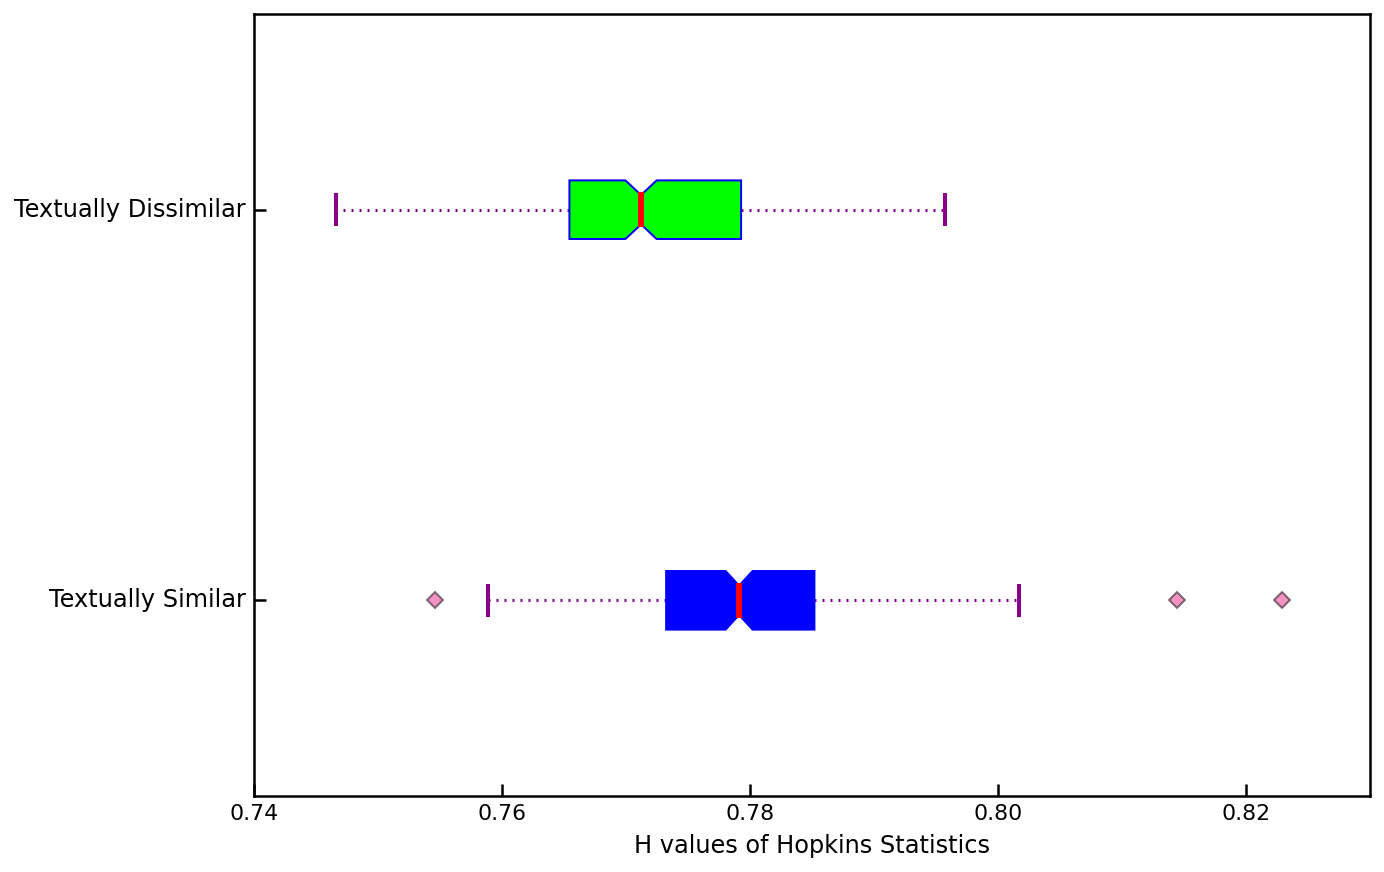

<Figure size 432x288 with 0 Axes>

In [73]:

# Import libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
import numpy as np
 
# Creating dataset
np.random.seed(10)
data_1 = l #tex_sim
data_2 = l1 #tex_dissim

data = [data_1, data_2]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
plt.xlabel('H values of Hopkins Statistics', fontsize = 12)
ax.set_yticklabels(['Textually Similar', 'Textually Dissimilar'], fontsize = 12)
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

fig = plt.figure()
fig.savefig('hopkin_eclipse.jpg')

In [74]:
!pip install PyNonpar

     |████████████████████████████████| 207 kB 7.8 MB/s 
     |████████████████████████████████| 297 kB 58.5 MB/s 
     |████████████████████████████████| 297 kB 63.9 MB/s 
     |████████████████████████████████| 296 kB 47.0 MB/s 
     |████████████████████████████████| 296 kB 46.6 MB/s 
     |████████████████████████████████| 280 kB 56.3 MB/s 
     |████████████████████████████████| 280 kB 50.3 MB/s 
     |████████████████████████████████| 280 kB 55.4 MB/s 
     |████████████████████████████████| 280 kB 49.4 MB/s 
     |████████████████████████████████| 279 kB 50.7 MB/s 
     |████████████████████████████████| 279 kB 31.6 MB/s 
     |████████████████████████████████| 272 kB 53.4 MB/s 
     |████████████████████████████████| 272 kB 45.1 MB/s 
     |████████████████████████████████| 272 kB 49.4 MB/s 
     |████████████████████████████████| 270 kB 44.3 MB/s 
     |████████████████████████████████| 270 kB 1.3 MB/s 
     |████████████████████████████████| 270 kB 47.1 MB/s 
     |██████████

In [75]:
pip install scipy pandas pingouin

     |████████████████████████████████| 183 kB 4.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 9.8 MB 18.5 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=a69708feeb61072701233aa616bf3f88e1607f82c31b40ef88d6563c1bbba784
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=87d1ac96747ad89001d92713b6a2cd40bfff2873188b96a55fe805e2eaee2153
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [76]:
## Significance test
import pandas as pd
import numpy as np
from scipy import stats
from numpy.random import seed
from scipy.stats import kstest
from scipy.stats import ks_2samp
np.random.seed(0)
rng = np.random.default_rng()
import pandas as pd
import numpy as np
from scipy import stats
from numpy.random import seed
from scipy.stats import kstest
from scipy.stats import ks_2samp
np.random.seed(0)
rng = np.random.default_rng()
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import cv2
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import PyNonpar
from PyNonpar.twosample import wilcoxon_mann_whitney_test

In [77]:
hopkin_sim = l
hopkin_sim

[0.7852064154180431,
 0.7816241389493717,
 0.7801477423503137,
 0.7736646871399228,
 0.7850236969099379,
 0.7844640393567397,
 0.7691577460234506,
 0.7909811498504552,
 0.7759243913476346,
 0.7788630989739771,
 0.7880896632872112,
 0.7773038498575634,
 0.7853685200969039,
 0.784565682639982,
 0.7721928792743473,
 0.779271526427724,
 0.7971996771548429,
 0.7834985538690976,
 0.7818303894151686,
 0.7940105580034416,
 0.7756143318475898,
 0.7687571580408947,
 0.7828308924114578,
 0.7847042246863025,
 0.7665637579241142,
 0.7805207866470232,
 0.7729836628552984,
 0.768464870386072,
 0.7958005743661821,
 0.7848326860252097,
 0.7814663549650522,
 0.7947094522271022,
 0.7775443200254588,
 0.7729943199697209,
 0.7896868360849788,
 0.7620494959641092,
 0.7794956529705723,
 0.7742020825036727,
 0.7820844631421099,
 0.775056364558742,
 0.7760725869842809,
 0.7714620682355342,
 0.7657275281970565,
 0.761557442380171,
 0.7802682962823905,
 0.799295770888126,
 0.7651371632444834,
 0.7701714296867938

In [78]:
hopkin_dissim= l1
hopkin_dissim

[0.7750801537152895,
 0.784190180992661,
 0.7597320419773628,
 0.7904671099741377,
 0.7729743285512365,
 0.7786896368750778,
 0.756954267437068,
 0.7791171731873882,
 0.770631634596505,
 0.7843750847081722,
 0.7850666639610997,
 0.7651330289999116,
 0.7686223343537035,
 0.7735591559341662,
 0.7654063914254824,
 0.7835546823912126,
 0.763388848052929,
 0.7659821238455571,
 0.7741902211746415,
 0.7706507239506428,
 0.7809675432818707,
 0.7721816277639781,
 0.7634391001988463,
 0.7837890111449007,
 0.760920592106273,
 0.7678101994319474,
 0.7596627768454015,
 0.773069053640954,
 0.7642142648322273,
 0.7752677922748403,
 0.7676840841185325,
 0.7616491576311686,
 0.7477387296985243,
 0.7779506264264577,
 0.7621094712594767,
 0.7950238520396512,
 0.7596356605213375,
 0.7645929312582664,
 0.757806618226693,
 0.7646228645760962,
 0.7720926237330116,
 0.77125235627666,
 0.767469581532574,
 0.7593852558655833,
 0.7493205513867526,
 0.7863397215630415,
 0.7687538695693106,
 0.7709111406240301,
 0

In [79]:
print ("eclipse_hopkin_sim_dist:", stats.kstest(hopkin_sim, 'norm')) # Not normal dist

eclipse_hopkin_sim_dist: KstestResult(statistic=0.774756879711032, pvalue=3.052307484650139e-190)


In [80]:
print ("eclipse_hopkin_dissim_dist:", stats.kstest(hopkin_dissim, 'norm')) # Not normal dist

eclipse_hopkin_dissim_dist: KstestResult(statistic=0.7723392177193051, pvalue=1.0600880852071405e-188)


In [81]:
from scipy.stats import mannwhitneyu

In [82]:
PyNonpar.twosample.wilcoxon_mann_whitney_test(hopkin_sim, hopkin_dissim, method= "asymptotic")

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'data' of function '_psrank_average'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../usr/local/lib/python3.7/dist-packages/PyNonpar/pseudorank.py", line 19:
@nu.jit(nopython=True)
def _psrank_average(data: list, group: list, N: int, n: list, a: int) -> list:
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'group' of function '_psrank_average'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-re

WilcoxonMannWhitneyResult(alternative='two.sided', statistic=-8.779195912224798, HodgesLehmann=-0.007516139728711846, lowerCI=-0.009065149962202979, upperCI=-0.005917468846738716, pvalue=1.6464751255786473e-18)

In [85]:
import math
z = abs(-8.779195912224798)
n = 147
r = z/math.sqrt(n)
print(r) #large effect

0.7240958747416356


In [84]:
#Effect size test
#Effect Size r less than 0.3 -> small effect
#Effect Size r between 0.3 and 0.5 -> medium effect
#Effect Size r greater than 0.5 -> large effect